In [4]:
import nltk
nltk.download('punkt')  # Download sentence tokenizer
nltk.download('averaged_perceptron_tagger')  # Download POS tagger
from nltk import word_tokenize, pos_tag, FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob  # Sentiment analysis
from collections import Counter  # Counter for trigrams
from wordcloud import WordCloud  # Wordcloud generation
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /media/mldadmin/home/s123mdg310_03/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /media/mldadmin/home/s123mdg310_03/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
with open("../transcripts/whisperx_transcript002.txt", "r") as f:
    text = f.read()
sentences = nltk.sent_tokenize(text)

In [6]:
# Tokenize sentences into words and filter out stopwords

filtered_tokens = [[word.lower() for word in word_tokenize(sentence) if word.lower() not in stopwords.words('english')] for sentence in sentences]

# Flatten the list of tokens
all_words = [word for sentence_words in filtered_tokens for word in sentence_words]

# Perform part-of-speech tagging
pos_tags = pos_tag(all_words)

# Extract trigrams (collocations)
trigrams = nltk.trigrams(all_words)

# Count frequencies of words
word_freq = FreqDist(all_words)

# Generate word cloud for meaningful words
wordcloud = WordCloud().generate_from_frequencies(word_freq)

In [9]:
from nltk.corpus import wordnet

# Define noun tags based on NLTK's tagset
NOUN_TAGS = ['NN', 'NNS', 'NNP', 'NNPS']  # Common noun tags (singular, plural, proper singular, proper plural)
words = nltk.tokenize.word_tokenize(text)
words = [word.lower() for word in words if word not in stopwords.words('english')]
# Filter most frequent nouns
fdist = nltk.FreqDist(words)
most_freq_nouns = [w for w, c in fdist.most_common(10)
                   if nltk.pos_tag([w])[0][1] in NOUN_TAGS]

In [10]:

print(most_freq_nouns)

['i', 'chuan']


In [7]:
# Number of speakers and names of speakers
speakers = [line.split(":")[0].strip() for line in text.split("\n") if line.strip()]
num_speakers = len(set(speakers))
speaker_names = set(speakers)

# Calculate who spoke the longest, least, and average
speaker_times = Counter(speakers)
longest_speaker = max(speaker_times, key=speaker_times.get)
least_speaker = min(speaker_times, key=speaker_times.get)
average_speaker = sum(speaker_times.values()) / len(speaker_times)


print("Number of speakers:", num_speakers)
print("Speaker names:", speaker_names)
print("Longest speaker:", longest_speaker)
print("Least speaker:", least_speaker)
print("Average speaking time:", average_speaker)

Number of speakers: 216
Speaker names: {"Chuan Chuan is doing what she can to make space. This double-decker bed was donated by a friend. The place has become very narrow. When I walk here, it will affect my husband's sleep. He will feel uncomfortable. Why is it so messy? Because I want to say something now. To be honest, most of these things are hers. She brought back the things she liked. She didn't want me to mess with her. You have to ask her first. If you don't ask her, she'll say, okay, you can throw it away. But if you don't do that, what will people do? She's unhappy, to", 'you get trapped by your own circumstances?', 'SPEAKER_03  35.173', 'SPEAKER_12  503.991', "He's the only one that I have now, Abby. Whatever that I've already lost in the past, I want to make up with him back. How did", 'SPEAKER_07  971.603', 'SPEAKER_03  608.179', 'you', 'SPEAKER_10  1181.634', 'I', 'It takes a long time to get to know her. But the things she does, her thoughts and the things she says, it g

Basic Analysis
Total number of words: 57609
1st common trigram: ('.', 'mr', 'speaker') (Count: 72 ) 2nd common trigram: ('mr', 'speaker', ',') (Count: 70 )


Positivity Score: 0.4546952224052718
Neutrality Score: 0.40087863811092805
Negativity Score: 0.14442613948380012
Duration Analysis
Spoke the most: Mr Speaker ( 53 sec)
Spoke the least: A-AA+ ( 1 sec)
Average speaking times:
A-AA+: 1.1204 sec Parliament No: 1.1204 sec Session No: 1.1204 sec Volume No: 1.1204 sec Sitting No: 1.1204 sec Sitting Date: 1.1204 sec PARLIAMENTARY DEBATES: 1.1204 sec SINGAPORE: 1.1204 sec OFFICIAL REPORT: 1.1204 sec FOURTEENTH PARLIAMENT: 1.1204 sec VOLUME 95NO 119: 1.1204 sec SECOND SESSION: 1.1204 sec Wednesday, 10 January 2024: 1.1204 sec The House met at 12: 1.1204 sec ATTENDANCE: 1.1204 sec PRESENT: 1.1204 sec Mr SPEAKER (Mr Seah Kian Peng (Marine Parade)).: 1.1204 sec Mr Ang Wei Neng (West Coast).: 1.1204 sec Mr Baey Yam Keng (Tampines), Senior Parliamentary Secretary to the Minister for Sustainability and the Environment and Minister for Transport.: 1.1204 sec Mr Chan Chun Sing (Tanjong Pagar), Minister for Education.: 1.1204 sec Miss Cheryl Chan Wei Lin

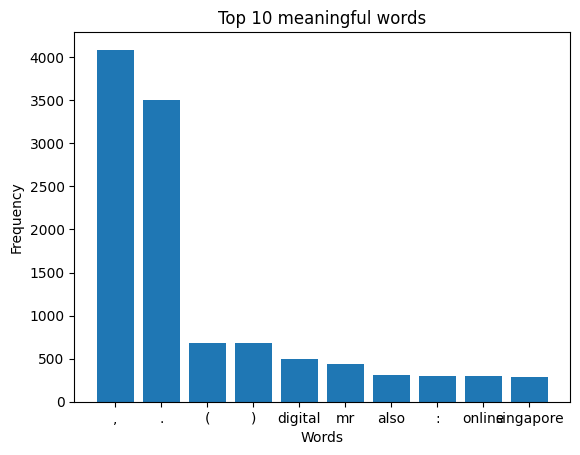

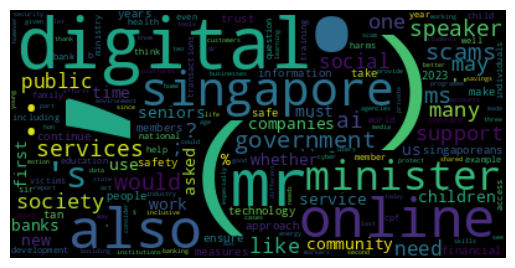

In [16]:
# Basic Analysis
total_words = len(all_words)
print("Basic Analysis")
print("Total number of words:", total_words)

# Common trigrams
trigram_freq = FreqDist(nltk.trigrams(all_words))
common_trigrams = trigram_freq.most_common(2)
print("1st common trigram:", common_trigrams[0][0], "(Count:", common_trigrams[0][1], ")", end=' ')
print("2nd common trigram:", common_trigrams[1][0], "(Count:", common_trigrams[1][1], ")")

# Sentiment Analysis
sentiments = [TextBlob(sentence).sentiment.polarity for sentence in sentences]
positivity_score = sum(1 for sentiment in sentiments if sentiment > 0) / len(sentiments)
negativity_score = sum(1 for sentiment in sentiments if sentiment < 0) / len(sentiments)
neutrality_score = sum(1 for sentiment in sentiments if sentiment == 0) / len(sentiments)
print("Positivity Score:", positivity_score)
print("Neutrality Score:", neutrality_score)
print("Negativity Score:", negativity_score)

# Duration Analysis
speaker_times = Counter(speakers)
most_speaker = max(speaker_times, key=speaker_times.get)
least_speaker = min(speaker_times, key=speaker_times.get)
print("Duration Analysis")
print("Spoke the most:", most_speaker, "(", speaker_times[most_speaker], "sec)")
print("Spoke the least:", least_speaker, "(", speaker_times[least_speaker], "sec)")
average_times = {speaker: sum(speaker_times[speaker] for speaker in speaker_times if speaker != least_speaker) / (len(speaker_times) - 1) for speaker in speaker_times}
print("Average speaking times:")
for speaker, avg_time in average_times.items():
    print(speaker + ":", round(avg_time, 4), "sec", end=" ")
print()

# Visual Analysis
print("Visual Analysis")
# Number of words excluding punctuation & stopwords
filtered_words_no_punct = [word for word in all_words if word.isalnum()]
num_words_no_punct = len(filtered_words_no_punct)
print("Number of words excluding punctuation & stopwords:", num_words_no_punct)
# Visual frequency chart of top 10 meaningful words (use matplotlib)
top_words = word_freq.most_common(10)
plt.bar(range(len(top_words)), [freq for word, freq in top_words], align='center')
plt.xticks(range(len(top_words)), [word for word, freq in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 meaningful words')
plt.show()
# Visual word cloud of most meaningful used words
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Graph Analysis
print("Graph Analysis")
num_speakers = len(set(speakers))
print("Num distinct speakers:", num_speakers)
num_questions_asked = sum(1 for sentence in sentences if '?' in sentence)
num_answers_given = sum(1 for sentence in sentences if '?' not in sentence and sentence.strip() != '')
print("Num questions asked:", num_questions_asked)
print("Num answers given:", num_answers_given)
speaker_questions = Counter([line.split(":")[0].strip() for line in sentences if '?' in line])
speaker_answers = Counter([line.split(":")[0].strip() for line in sentences if '?' not in line and line.strip() != ''])
#most_questions_asked = max(speaker_questions, key=speaker_questions.get)
most_answers_given = max(speaker_answers, key=speaker_answers.get)
print("Answered the most questions:", most_answers_given, "(", speaker_answers[most_answers_given], "answered)")
#print("Asked the most questions:", most_questions_asked, "(", speaker_questions[most_questions_asked], "asked)")

# Pair with most back-and-forth
speaker_dialogues = {}
for speaker, line in zip(speakers, sentences):
    if speaker in speaker_dialogues:
        speaker_dialogues[speaker].append(line)
    else:
        speaker_dialogues[speaker] = [line]
back_and_forth = [(speaker1, speaker2) for speaker1 in speaker_dialogues for speaker2 in speaker_dialogues if speaker1 != speaker2 and len(speaker_dialogues[speaker1]) == len(speaker_dialogues[speaker2])]
pair_with_most_back_and_forth = max(set(back_and_forth), key=back_and_forth.count)
print("Pair w/ most back-and-forth:", pair_with_most_back_and_forth)


In [2]:
import requests
url = 'http://techcrunch.com/2016/05/26/snapchat-series-f/'
r = requests.get(url)
